In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
original = np.load('/hpc/mzhu843/image-processing/minian/results/experiment5/recording_arrays/original.npy')

In [19]:
glow_removed = np.load('/hpc/mzhu843/image-processing/minian/results/experiment5/recording_arrays/glow_removed.npy')

In [ ]:
original_max_proj = np.max(original, axis=0)
print(np.mean(original_max_proj))
print(np.std(original_max_proj))
print(np.min(original_max_proj))
print(np.max(original_max_proj))
glow_removed_max_proj = np.max(glow_removed, axis=0)
print(np.mean(glow_removed_max_proj))
print(np.std(glow_removed_max_proj))
print(np.min(glow_removed_max_proj))
print(np.max(glow_removed_max_proj))

intensities = original_max_proj.flatten()

# Define bin edges
bin_edges = np.arange(0, 270, 10)  # Range from 0 to 75 with bin width of 5

# Plot histogram
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.hist(intensities, bins=bin_edges, color='teal', edgecolor='black')
ax1.set_ylim(0, 90000)


# Set plot labels and title'
ax2.set_xlabel('Intensity')
ax1.set_ylabel('Frequency')
ax1.set_title('Pixel Intensities Before Glow Removal')

intensities = glow_removed_max_proj.flatten()
# Define bin edges
bin_edges = np.arange(0, 270, 10)  # Range from 0 to 75 with bin width of 5

ax2.hist(intensities, bins=bin_edges, color='teal', edgecolor='black')
ax2.set_ylim(0, 90000)

# Set plot labels and title
ax2.set_xlabel('Intensity')
ax2.set_ylabel('Frequency')
ax2.set_title('Pixel Intensities After Glow Removal')

plt.subplots_adjust(hspace=0.4)

# # Display the plot
plt.savefig('/hpc/mzhu843/image-processing/minian/visualisations/experiment5/glow removal/intensities.png')
plt.close()

73.63961657801418
45.32603759265985
0
255
55.45860483156029
30.82898816331916
0
205


In [4]:
denoise = np.load('/hpc/mzhu843/image-processing/minian/results/experiment5/recording_arrays/denoised.npy')

In [31]:
subsets = 10
num_final_subsets = subsets
indices = []

z, y, x = denoise.shape
x_size = x // 4
y_size = y // 4

for i in range(subsets):
    indices.append(((np.random.randint(0, x - x_size), np.random.randint(0, y - y_size))))

[(246, 109), (240, 196), (483, 129), (398, 86), (154, 142), (275, 229), (406, 199), (7, 305), (244, 203), (502, 45)]


In [32]:

total_snr = 0

for start_x, start_y in indices:
    random_slice = denoise[:, start_y:start_y + y_size, start_x:start_x + x_size]
    slice_projection = np.max(random_slice, axis=0)

    max_value = np.max(slice_projection)
    max_row, max_col = np.where(slice_projection == max_value)[0][0], np.where(slice_projection == max_value)[1][0]

    cell_width = 15

    slice_shape = random_slice.shape


    start_row = max(max_row - cell_width, 0)
    end_row = min(max_row + cell_width + 1, slice_shape[1])
    start_col = max(max_col - cell_width, 0)
    end_col = min(max_col + cell_width + 1, slice_shape[2])

    surrounding_region = random_slice[:, start_row:end_row, start_col:end_col]

    for frame in surrounding_region:

        std = np.std(frame)
        mean = np.mean(frame)
        if std == 0:
            num_final_subsets -= 1
            break
        total_snr += (mean / std) / len(surrounding_region)

print(total_snr / num_final_subsets)
print(num_final_subsets)

27.71104960376647
10


In [33]:
total_snr = 0

for start_x, start_y in indices:
    random_slice = glow_removed[:, start_y:start_y + y_size, start_x:start_x + x_size]
    slice_projection = np.max(random_slice, axis=0)

    max_value = np.max(slice_projection)
    max_row, max_col = np.where(slice_projection == max_value)[0][0], np.where(slice_projection == max_value)[1][0]

    cell_width = 15

    slice_shape = random_slice.shape


    start_row = max(max_row - cell_width, 0)
    end_row = min(max_row + cell_width + 1, slice_shape[1])
    start_col = max(max_col - cell_width, 0)
    end_col = min(max_col + cell_width + 1, slice_shape[2])

    surrounding_region = random_slice[:, start_row:end_row, start_col:end_col]

    
    for frame in surrounding_region:

        std = np.std(frame)
        mean = np.mean(frame)
        if std == 0:
            num_final_subsets -= 1
            break
        total_snr += (mean / std) / len(surrounding_region)

print(total_snr / num_final_subsets)
print(num_final_subsets)

15.425725857624721
10


In [5]:
background_removed = np.load('/hpc/mzhu843/image-processing/minian/results/experiment5/recording_arrays/background_removed.npy')

In [7]:
intensity_ranges_dict = {}

for x in range(np.size(denoise, axis=2)):
    for y in range(np.size(denoise, axis=1)):
        intensity_range = np.max(denoise[:, y, x]) - np.min(denoise[:, y, x])
        if intensity_range not in intensity_ranges_dict.keys():
            intensity_ranges_dict[intensity_range] = 1
        else:
            intensity_ranges_dict[intensity_range] += 1        

In [8]:
keys = list(intensity_ranges_dict.keys())
values = list(intensity_ranges_dict.values())

In [9]:
intensity_ranges_dict_background_removed = {}

for x in range(np.size(background_removed, axis=2)):
    for y in range(np.size(background_removed, axis=1)):
        intensity_range = np.max(background_removed[:, y, x]) - np.min(background_removed[:, y, x])
        if intensity_range not in intensity_ranges_dict_background_removed.keys():
            intensity_ranges_dict_background_removed[intensity_range] = 1
        else:
            intensity_ranges_dict_background_removed[intensity_range] += 1        

In [10]:
keys_background = list(intensity_ranges_dict_background_removed.keys())
values_background = list(intensity_ranges_dict_background_removed.values())

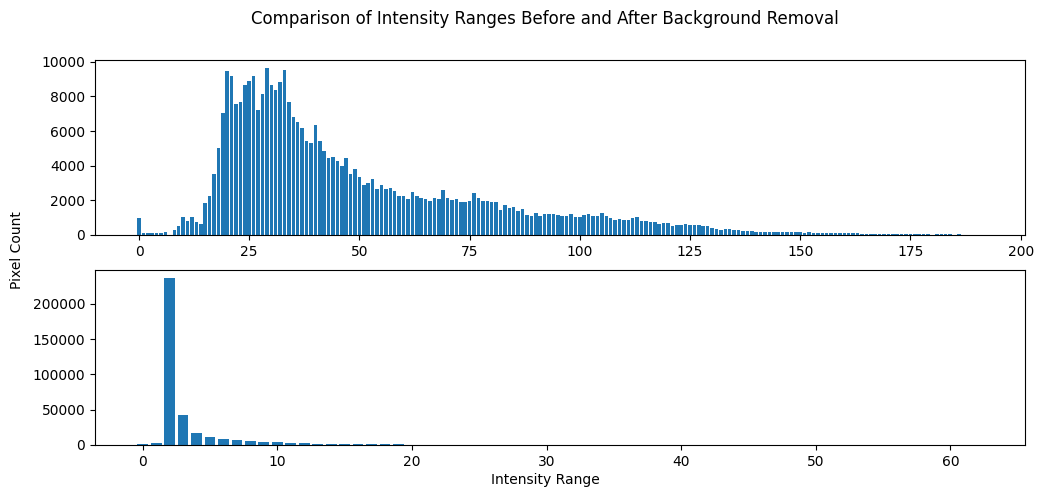

In [21]:
fig, axs = plt.subplots(2, 1, figsize=(12, 5))
axs[0].bar(keys, values)
axs[1].bar(keys_background, values_background)
fig.suptitle('Comparison of Intensity Ranges Before and After Background Removal')
fig.text(0.5, 0.04, 'Intensity Range', ha='center', va='center')
fig.text(0.06, 0.5, 'Pixel Count', ha='center', va='center', rotation='vertical')
plt.savefig('/hpc/mzhu843/image-processing/minian/visualisations/experiment5/output')

